In [155]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [5]:
df=pd.read_csv('Minsk2020_ALS_dataset.csv')

In [7]:
df.head()

,ID,Sex,Age,J1_a,J3_a,J5_a,J55_a,S1_a,S3_a,S5_a,...,dCCi(7),dCCi(8),dCCi(9),dCCi(10),dCCi(11),dCCi(12),d_1,F2_i,F2_{conv},Diagnosis (ALS)
0,8,M,58,0.321817,0.141230,0.199128,0.923634,6.044559,3.196477,3.770575,...,-0.024467,-0.005300,0.051874,-0.037710,-0.026549,-0.021149,4.825476,2526.285657,833.498083,1
1,20,F,57,0.344026,0.177032,0.206458,0.827714,1.967728,0.856639,1.179851,...,0.002485,-0.004535,-0.000225,-0.006977,-0.012510,0.014773,5.729322,1985.712014,561.802625,1
2,21,F,58,0.264740,0.148228,0.177078,0.532566,1.850893,0.942743,1.071950,...,-0.013927,0.007908,0.007960,-0.009022,-0.012488,-0.015588,8.258488,2364.695972,796.723440,1
3,22,F,70,0.455793,0.174870,0.243660,0.962641,2.883768,1.284926,1.915058,...,-0.019285,-0.021768,0.020495,0.035976,-0.034648,0.008021,5.447137,1860.172768,359.409974,1
4,24,M,66,0.269335,0.143961,0.167465,0.547745,2.327924,1.164109,1.420891,...,-0.005743,0.004726,-0.015247,0.003900,-0.007686,-0.003784,8.562517,2051.627447,817.111847,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 135 entries, ID to Diagnosis (ALS)
dtypes: float64(131), int64(3), object(1)
memory usage: 67.6+ KB


In [15]:
df.describe()

,ID,Age,J1_a,J3_a,J5_a,J55_a,S1_a,S3_a,S5_a,S11_a,...,dCCi(7),dCCi(8),dCCi(9),dCCi(10),dCCi(11),dCCi(12),d_1,F2_i,F2_{conv},Diagnosis (ALS)
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,67.875000,56.390625,0.658951,0.379242,0.395886,0.945496,5.072071,2.617924,3.078959,4.393513,...,0.003393,0.006224,-0.002889,-0.002152,-0.001969,0.001269,9.164473,2495.116475,1209.976405,0.484375
std,37.358198,10.203668,0.724002,0.435636,0.431926,0.791558,4.087221,2.289347,2.568471,3.327968,...,0.033268,0.024670,0.028315,0.019542,0.018012,0.020800,2.681449,617.755856,553.694046,0.503706
min,2.000000,34.000000,0.098881,0.065791,0.092655,0.285497,0.883453,0.449099,0.497111,0.804179,...,-0.052002,-0.069202,-0.120838,-0.065735,-0.042955,-0.083977,2.276702,444.730268,48.246203,0.000000
25%,31.750000,50.750000,0.325932,0.172422,0.198274,0.538387,2.641830,1.369446,1.508064,2.123761,...,-0.008234,-0.004222,-0.009654,-0.009853,-0.012674,-0.006534,7.604734,2051.627447,800.181156,0.000000
50%,66.500000,58.000000,0.458935,0.253976,0.293405,0.698183,4.198486,1.966045,2.653666,3.634994,...,0.000775,0.006272,-0.000937,-0.001614,-0.003921,0.000661,9.646564,2471.097222,1206.596083,0.000000
75%,98.250000,63.250000,0.772783,0.465699,0.476541,1.189025,6.259731,3.258184,3.801504,5.644808,...,0.011561,0.019092,0.006745,0.008349,0.005578,0.009515,10.757522,2938.236560,1551.677678,1.000000
max,131.000000,80.000000,5.391649,3.217293,3.321567,5.991336,29.441589,16.791944,18.368778,20.750202,...,0.220533,0.089766,0.080337,0.057303,0.061026,0.077897,15.420777,3599.554394,2441.219054,1.000000


In [44]:
df.isna().sum()

ID                 0
Sex                0
Age                0
J1_a               0
J3_a               0
                  ..
dCCi(12)           0
d_1                0
F2_i               0
F2_{conv}          0
Diagnosis (ALS)    0
Length: 135, dtype: int64

In [46]:
df.isna().values.any()

False

In [50]:
df.duplicated().any()

False

<Axes: xlabel='Age', ylabel='count'>

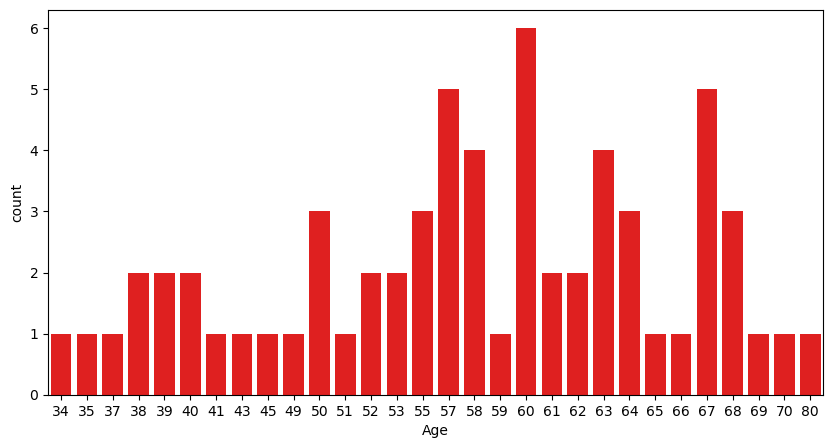

In [94]:
plt.figure(figsize=[10,5])
sns.countplot(x=df['Age'],data=df,color='red')

In [120]:
label_encode=LabelEncoder()
df['Sex']=label_encode.fit_transform(df['Sex'])

In [122]:
x=df.drop(columns='Diagnosis (ALS)')
y=df['Diagnosis (ALS)']

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
lin_pred= lin_model.predict(x_test)

In [128]:
mse = mean_squared_error(y_test, lin_pred)
r2 = r2_score(y_test, lin_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.1489825257311743
R^2 Score: -3.5959301029246973


<Axes: ylabel='Diagnosis (ALS)'>

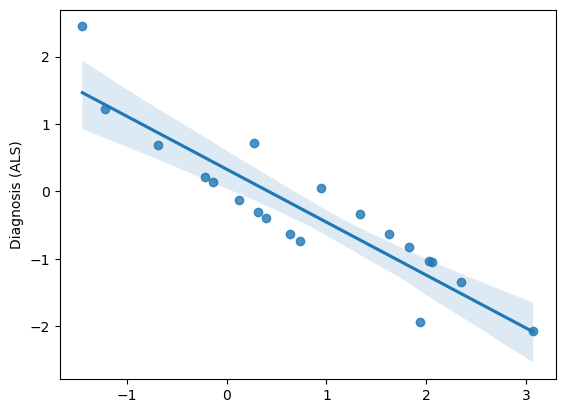

In [132]:
sns.regplot(x=lin_pred, y=y_test-lin_pred,data=df)

In [143]:
from sklearn.tree import DecisionTreeClassifier
des_tree=DecisionTreeClassifier(random_state=42)
des_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [171]:
tree_pred = des_tree.predict(x_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
print(f'Accuracy Score: {tree_accuracy:.4f}')
tree_report= classification_report(y_test, tree_pred)
tree_conf_matrix= confusion_matrix(y_test, tree_pred)
print(f'report: {tree_report}')
print(f'conf_matrix: {tree_conf_matrix}')

bay_precision = precision_score(y_test, tree_pred)
bay_recall = recall_score(y_test, tree_pred)
print("precision_score:",bay_precision)
print("recal:",bay_recall)

Accuracy Score: 0.7500
report:               precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.78      0.70      0.74        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20

conf_matrix: [[8 2]
 [3 7]]
precision_score: 0.7777777777777778
recal: 0.7


In [147]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [169]:
ran_pred = random_forest.predict(x_test)
ran_accuracy = accuracy_score(y_test, ran_pred)
ran_report= classification_report(y_test, ran_pred)
ran_conf_matrix= confusion_matrix(y_test, ran_pred)
print(f'Accuracy Score: {ran_accuracy:.4f}')
print(f'report: {ran_report}')
print(f'conf_matrix: {ran_conf_matrix}')

bay_precision = precision_score(y_test, ran_pred)
bay_recall = recall_score(y_test, ran_pred)
print("precision_score:",bay_precision)
print("recal:",bay_recall)

Accuracy Score: 0.8500
report:               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

conf_matrix: [[10  0]
 [ 3  7]]
precision_score: 1.0
recal: 0.7


In [151]:
from sklearn.naive_bayes import GaussianNB
Bayes_model = GaussianNB()
Bayes_model.fit(x_train, y_train)

GaussianNB()

In [175]:
bays_pred = Bayes_model.predict(x_test)

bays_accuracy = accuracy_score(y_test, bays_pred)
print(f'Accuracy Score: {bays_accuracy:.4f}')
print(classification_report(y_test, bays_pred))
print(confusion_matrix(y_test, bays_pred))

bay_precision = precision_score(y_test, bays_pred)
bay_recall = recall_score(y_test, bays_pred)
print("precision_score:",bay_precision)
print("recal:",bay_recall)

Accuracy Score: 0.8000
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20

[[9 1]
 [3 7]]
precision_score: 0.875
recal: 0.7
